# Arima and Seasonal Arima on brand wise forecasting -  Amberville, Woodsworth, Mudramark 

The general process for ARIMA model is following:
- Visualize the time series (Check whether the time series data is stationary or not if not then we will make it stationary)
- Make the time series data stationary
- Plot the correlation and autocorrelation charts 
- Construct the ARIMA and Seasonal ARIMA based on the data
- Use the model to make prediction

# Amberville

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Amberville.csv")

In [3]:
df.head()

,week,sales
0,03-01-2019,19
1,10-01-2019,31
2,17-01-2019,15
3,24-01-2019,24
4,31-01-2019,26


In [4]:
#Convert month into date and time
df['week'] = pd.to_datetime(df['week'])

In [5]:
df.head()

,week,sales
0,2019-03-01,19
1,2019-10-01,31
2,2019-01-17,15
3,2019-01-24,24
4,2019-01-31,26


In [6]:
#week as a index
df.set_index('week', inplace = True)

In [7]:
df.head()

,sales
week,
2019-03-01,19
2019-10-01,31
2019-01-17,15
2019-01-24,24
2019-01-31,26


**Visualisation of data**

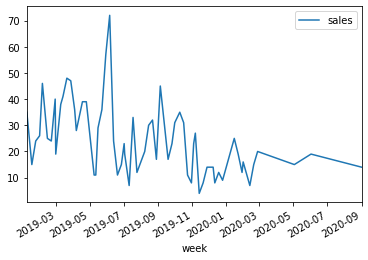

In [8]:
df.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [9]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [10]:
test_result = adfuller(df['sales'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [11]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 5 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [12]:
ad_fuller(df['sales'])

ADF Test statistic : -3.7643037967375554
p-value : 0.0032943922216135857
#Lags used : 0
Number of observations used : 61
We reject the null hypothesis. Data is stationary.


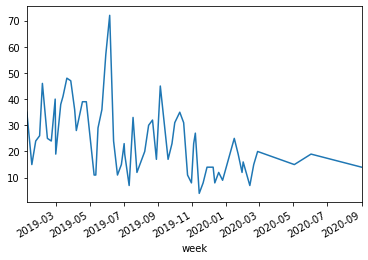

In [13]:
#plot and check
df['sales'].plot()
#Data is stationary rejecting the null hypothesis and accepting the alternate hypothesis.

# Auto regressive Model

In [14]:
from pandas.plotting import autocorrelation_plot

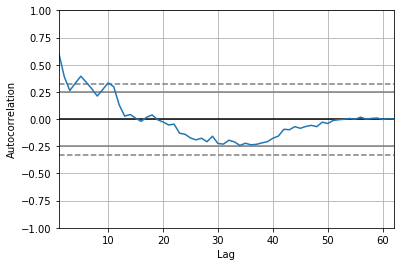

In [15]:
autocorrelation_plot(df['sales'])
plt.show()

Final Thoughts on Autocorrelation and Partial Autocorrelation
- Identification of an AR model is done with the PACF. Select 3 values.
p- AR Model lags
d - differncing
q- moving average lags
- iloc are total nan value
- AC there will be exponential derease
- PACF it wil be sudden shutsoff.


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

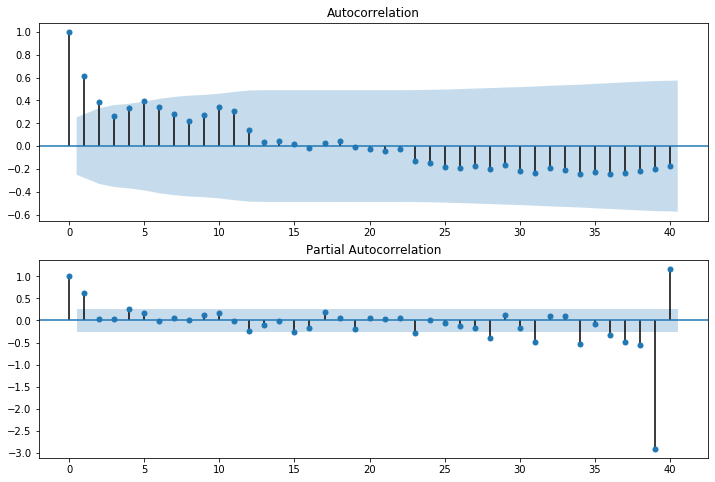

In [17]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

**ARIMA**

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model = ARIMA(df['sales'], order = (1,0,1)) #(p,d,q)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   62
Model:                     ARMA(1, 1)   Log Likelihood                -235.660
Method:                       css-mle   S.D. of innovations             10.787
Date:                Sat, 28 Mar 2020   AIC                            479.320
Time:                        11:43:17   BIC                            487.828
Sample:                             0   HQIC                           482.660
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.0095      3.486      6.887      0.000      17.177      30.842
ar.L1.sales     0.6408      0.175      3.668      0.001       0.298       0.983
ma.L1.sales    -0.0620      0.243     -0.256      0.799      -0.537       0.413
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5606           +0.0000j            1.5606            0.0000
MA.1           16.1200           +0.0000j           16.1200            0.0000
-----------------------------------------------------------------------------
"""

View

In [21]:
df.tail(15)

,sales
week,
2019-11-28,14
2019-05-12,11
2019-12-12,8
2019-12-19,12
2019-12-26,9
2020-02-01,16
2020-09-01,14
2020-01-16,25
2020-01-23,19


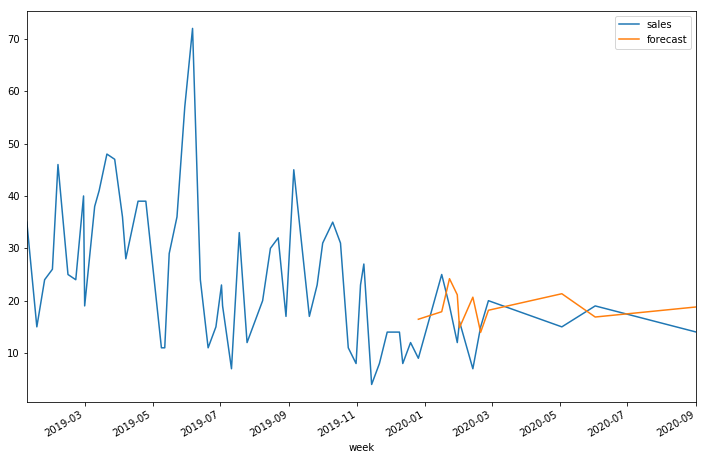

In [22]:
df['forecast']=model_fit.predict(start='2019-12-26',end='2020-05-03')
df[['sales','forecast']].plot(figsize=(12,8))


**Metrics to check accuracy- ARIMA**

In [28]:
farima = df['forecast']['2019-12-26' : ]
actual = df['sales']['2019-12-26' :]

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 43.320377
Mean Absolute Error of Amberville Brand Using Arima: 5.438474


# Wood

In [21]:
df1 = pd.read_csv("wood.csv")

In [22]:
df1.head()

,week,sales
0,03-01-2019,201
1,10-01-2019,143
2,17-01-2019,148
3,24-01-2019,133
4,31-01-2019,138


In [23]:
#Convert month into date and time
df1['week'] = pd.to_datetime(df1['week'])

In [24]:
df1.head()

,week,sales
0,2019-03-01,201
1,2019-10-01,143
2,2019-01-17,148
3,2019-01-24,133
4,2019-01-31,138


In [25]:
#week as a index
df1.set_index('week', inplace = True)

In [43]:
df1.head()

,sales
week,
2019-03-01,201
2019-10-01,143
2019-01-17,148
2019-01-24,133
2019-01-31,138


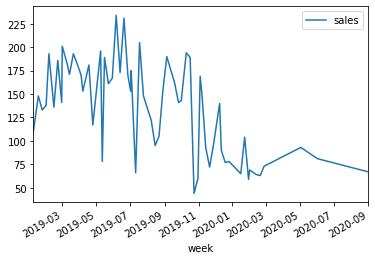

In [26]:
df1.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [27]:
test_result1 = adfuller(df1['sales'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [28]:
ad_fuller(df1['sales'])

ADF Test statistic : -1.9996570795931095
p-value : 0.28672347805648657
#Lags used : 1
Number of observations used : 60
We can not reject null hypothesis. Data is not stationary


**Transformation**

In [47]:
df1['sales after first diff.'] = np.log(df1['sales']) #doing first order differentiation

In [48]:
ad_fuller(df1['sales after first diff.']) #checking now, still data is not stationary.

ADF Test statistic : -1.9573655882649128
p-value : 0.30557379530661194
#Lags used : 1
Number of observations used : 60
We can not reject null hypothesis. Data is not stationary


In [49]:
df1['sales after second diff.'] = np.log(df1['sales after first diff.']) #doing second order differentiation

In [50]:
ad_fuller(df1['sales after second diff.']) #checking now, still data is not stationary.

ADF Test statistic : -1.9808677209932706
p-value : 0.29502442414604413
#Lags used : 1
Number of observations used : 60
We can not reject null hypothesis. Data is not stationary


In [51]:
#now doing only difference by giving one shift of the data.

df1['sales second difference'] = df1['sales after second diff.'] - df1['sales after second diff.'].shift(1)

In [52]:
df1.head()

,sales,sales after first diff.,sales after second diff.,sales second difference
week,,,,
2019-03-01,201,5.303305,1.668330,NaN
2019-10-01,143,4.962845,1.601979,-0.066351
2019-01-17,148,4.997212,1.608880,0.006901
2019-01-24,133,4.890349,1.587264,-0.021617
2019-01-31,138,4.927254,1.594782,0.007518


In [53]:
#removing na values to do ad_fuller test for 'sales second difference'
ad_fuller(df1['sales second difference'].dropna()) 
#now, the data is stationary i.e very low p value

ADF Test statistic : -6.686317224218796
p-value : 4.21731348146955e-09
#Lags used : 2
Number of observations used : 58
We reject the null hypothesis. Data is stationary.


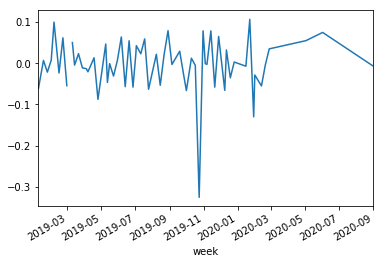

In [54]:
#plot and check
df1['sales second difference'].plot()
plt.figure(figsize = (12,8))

**Auto Regressive Model**

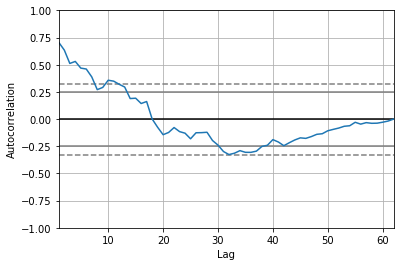

In [29]:
autocorrelation_plot(df1['sales'])
plt.show()

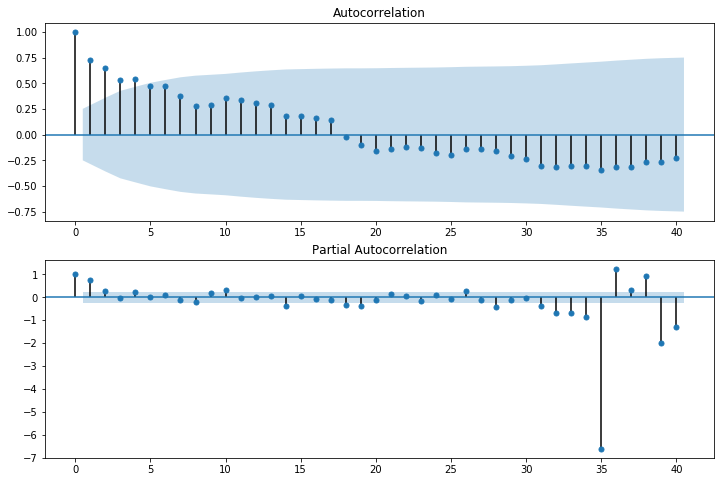

In [30]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['sales'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['sales'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

**ARIMA**

In [31]:
model = ARIMA(df1['sales'], order = (1,1,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [58]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   61
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -302.254
Method:                       css-mle   S.D. of innovations             34.286
Date:                Fri, 27 Mar 2020   AIC                            610.508
Time:                        19:53:43   BIC                            616.841
Sample:                             1   HQIC                           612.990
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6117      3.182     -0.507      0.614      -7.848       4.624
ar.L1.D.sales    -0.3861      0.120     -3.231      0.002      -0.620      -0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5900           +0.0000j            2.5900            0.5000
-----------------------------------------------------------------------------
"""

In [61]:
df1.tail(15)

,sales,sales after first diff.,sales after second diff.,sales second difference
week,,,,
2019-11-28,96,4.564348,1.518276,0.065102
2019-05-12,78,4.356709,1.471717,-0.046559
2019-12-12,90,4.499810,1.504035,0.032318
2019-12-19,77,4.343805,1.468751,-0.035284
2019-12-26,78,4.356709,1.471717,0.002966
2020-02-01,69,4.234107,1.443172,-0.028545
2020-09-01,67,4.204693,1.436201,-0.006971
2020-01-16,65,4.174387,1.428968,-0.007234
2020-01-23,104,4.644391,1.535660,0.106693


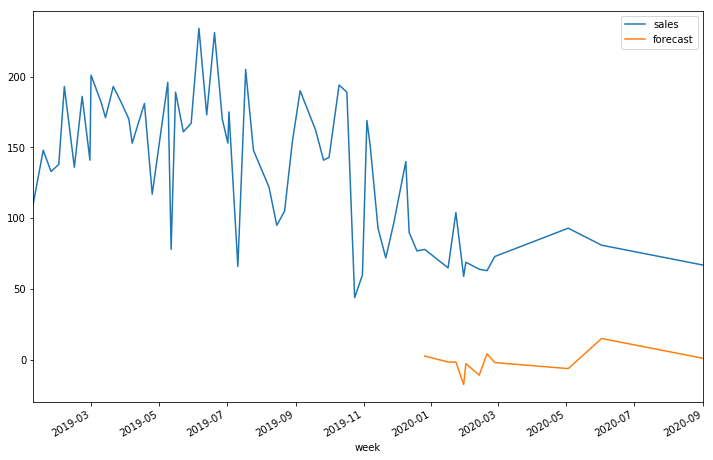

In [62]:
df1['forecast']=model_fit.predict(start='2019-12-26',end='2020-05-03')
df1[['sales','forecast']].plot(figsize=(12,8))
#it doesn't perform well

In [32]:
model1=sm.tsa.statespace.SARIMAX(df1['sales'],order=(1, 1, 0),seasonal_order=(1,1,1,7))
results=model1.fit()
#this performs better.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


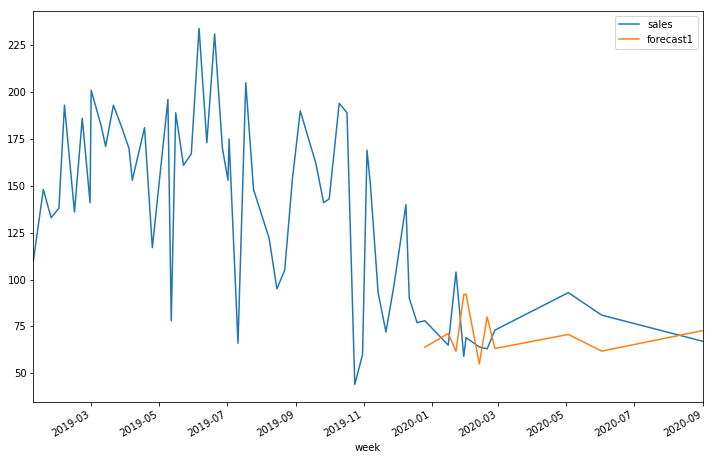

In [72]:
df1['forecast1']=results.predict(start='2019-12-26',end='2020-05-03') #predicting 2020 sales
df1[['sales','forecast1']].plot(figsize=(12,8))

**Metrics to check accuracy- ARIMA**

In [75]:
farima = df1['forecast1']['2019-12-26' : ]
actual = df1['sales']['2019-12-26' :]

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Wood Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Wood Brand Using Arima: %f' % mae)

Mean Squared Error of Wood Brand Using Arima: 456.773487
Mean Absolute Error of Wood Brand Using Arima: 18.368344


# Mudramark

In [35]:
df2 = pd.read_csv("Mudramark.csv")

In [36]:
df2.head()

,week,sales
0,03-01-2019,11
1,10-01-2019,16
2,17-01-2019,6
3,24-01-2019,25
4,31-01-2019,22


In [37]:
df2['week'] = pd.to_datetime(df2['week'])

In [80]:
df2.head()

,week,sales
0,2019-03-01,11
1,2019-10-01,16
2,2019-01-17,6
3,2019-01-24,25
4,2019-01-31,22


In [40]:
#week as a index
df2.set_index('week', inplace = True)

In [41]:
df2.head()

,sales
week,
2019-03-01,11
2019-10-01,16
2019-01-17,6
2019-01-24,25
2019-01-31,22


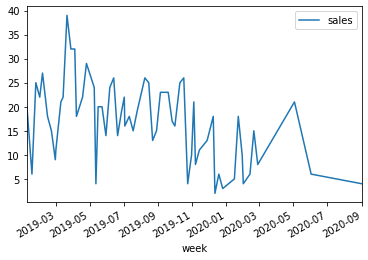

In [42]:
df2.plot()

In [43]:
test_result2 = adfuller(df2['sales']) #adfuller gives 5 different values
#it will defined in labels downwards (Dickey-Fuller Test)

In [44]:
ad_fuller(df2['sales'])

ADF Test statistic : -1.70811392594366
p-value : 0.4269368616344357
#Lags used : 9
Number of observations used : 52
We can not reject null hypothesis. Data is not stationary


**Transformation**

In [45]:
df2['sales after first diff.'] = np.log(df2['sales']) #doing first order differentiation

In [46]:
ad_fuller(df2['sales after first diff.']) #checking now, still data is not stationary.

ADF Test statistic : -2.1992814044076927
p-value : 0.20650636897748637
#Lags used : 2
Number of observations used : 59
We can not reject null hypothesis. Data is not stationary


In [47]:
df2['sales after second diff.'] = np.log(df2['sales after first diff.']) #doing second order differentiation

In [48]:
ad_fuller(df2['sales after second diff.']) #checking now, still data is not stationary.

ADF Test statistic : -2.1881077163616007
p-value : 0.21058994778420648
#Lags used : 2
Number of observations used : 59
We can not reject null hypothesis. Data is not stationary


In [49]:
#now doing only difference by giving one shift of the data.

df2['sales second difference'] = df2['sales after second diff.'] - df2['sales after second diff.'].shift(1)

In [50]:
df2.head()

,sales,sales after first diff.,sales after second diff.,sales second difference
week,,,,
2019-03-01,11,2.397895,0.874591,NaN
2019-10-01,16,2.772589,1.019781,0.145190
2019-01-17,6,1.791759,0.583198,-0.436583
2019-01-24,25,3.218876,1.169032,0.585834
2019-01-31,22,3.091042,1.128508,-0.040524


In [51]:
#removing na values to do ad_fuller test for 'sales second difference'
ad_fuller(df2['sales second difference'].dropna()) 
#now, the data is stationary i.e very low p value

ADF Test statistic : -8.204844907400526
p-value : 7.069987969040935e-13
#Lags used : 1
Number of observations used : 59
We reject the null hypothesis. Data is stationary.


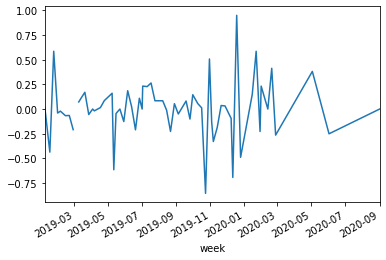

In [52]:
#plot and check
df2['sales second difference'].plot()

**Auto regressive Model**

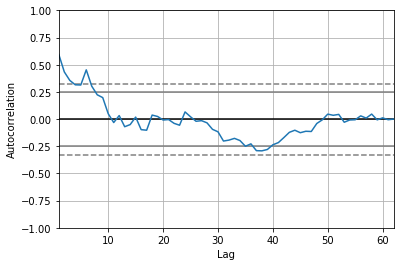

In [53]:
autocorrelation_plot(df2['sales'])
plt.show()

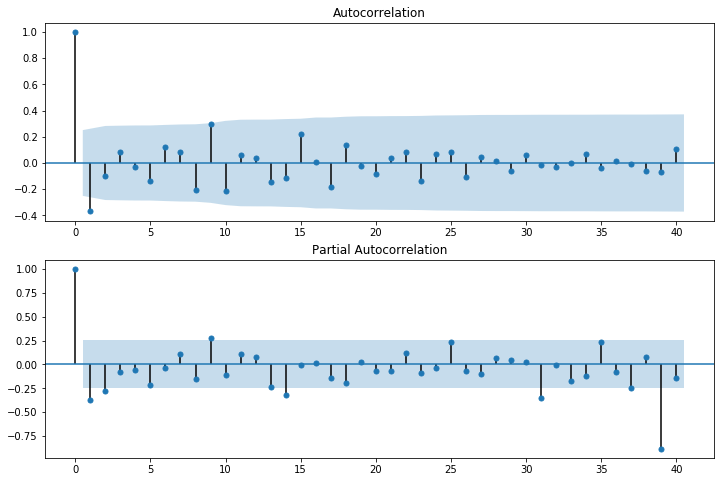

In [54]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['sales second difference'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['sales second difference'].iloc[1:], lags = 40, ax = ax2)

# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 0 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)
#d = 1 from differencing done only 1 time

In [55]:
model = ARIMA(df2['sales'], order = (1,1,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   61
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -206.029
Method:                       css-mle   S.D. of innovations              7.084
Date:                Sat, 28 Mar 2020   AIC                            418.059
Time:                        11:47:17   BIC                            424.391
Sample:                             1   HQIC                           420.540
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0975      0.704      0.139      0.890      -1.281       1.476
ar.L1.D.sales    -0.2947      0.125     -2.359      0.022      -0.539      -0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3936           +0.0000j            3.3936            0.5000
-----------------------------------------------------------------------------
"""

In [98]:
df2.tail(15)

,sales,sales after first diff.,sales after second diff.,sales second difference
week,,,,
2019-11-28,13,2.564949,0.941939,0.031704
2019-05-12,4,1.386294,0.326634,-0.615304
2019-12-12,2,0.693147,-0.366513,-0.693147
2019-12-19,6,1.791759,0.583198,0.949711
2019-12-26,3,1.098612,0.094048,-0.489150
2020-02-01,4,1.386294,0.326634,0.232586
2020-09-01,4,1.386294,0.326634,0.000000
2020-01-16,5,1.609438,0.475885,0.149251
2020-01-23,18,2.890372,1.061385,0.585500


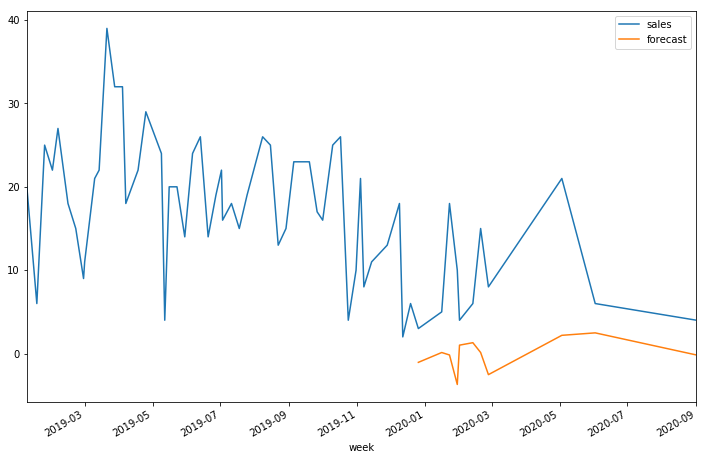

In [99]:
df2['forecast']=model_fit.predict(start='2019-12-26',end='2020-05-03')
df2[['sales','forecast']].plot(figsize=(12,8))
#it doesn't perform well

In [57]:
model2=sm.tsa.statespace.SARIMAX(df2['sales'],order=(1, 1, 0),seasonal_order=(1,1,1,7))
results2=model2.fit()
#this performs better.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


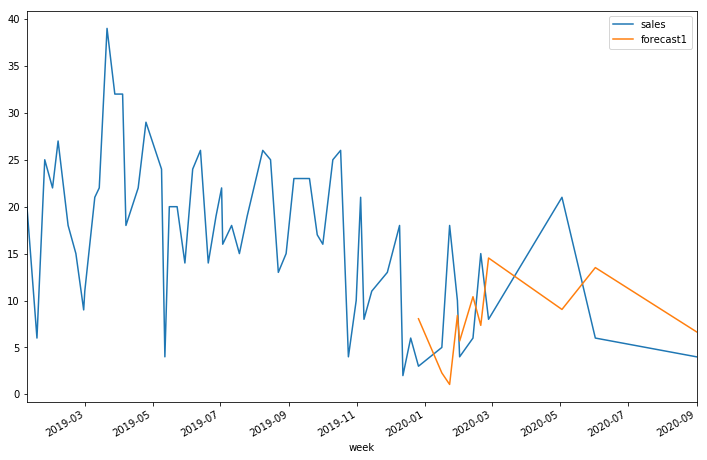

In [101]:
df2['forecast1']=results2.predict(start='2019-12-26',end='2020-05-03') #predicting 2020 sales
df2[['sales','forecast1']].plot(figsize=(12,8))

**Metrics to check the accuracy- ARIMA**

In [102]:
farima = df2['forecast1']['2019-12-26' : ]
actual = df2['sales']['2019-12-26' :]

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Mudramark Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Mudramark Brand Using Arima: %f' % mae)

Mean Squared Error of Mudramark Brand Using Arima: 59.296146
Mean Absolute Error of Mudramark Brand Using Arima: 6.244316


# THE END